In [1]:
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation, Dense, Flatten
from keras import backend
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer as lbin

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Make advanced branching with wrapping $img\_to\_array$ function into a class

In [2]:
class ArrayFromImage:
    
    def __init__(self, data_format=None):
        # data format of the image
        self.data_format = data_format
    def convert(self, image):
        # perform reshaping input image into array 
        return img_to_array(image, data_format=self.data_format)

<center><h2>ShallowNet</h2>
<h4>a CNN with one convolutional layer</h4>

<h4> $ INPUT =>  CONV  =>  RELU  =>   FC $</h4>
</center>


In [2]:
class ShallowNet:
    @staticmethod
    def build(w, h, d, classes):
        # Initialize the model
        model = Sequential()
        # Set the shape of input layer
        input_layer_shape = (h,w,d)
        # Add CONV layer
        model.add(Conv2D(32,(3,3), padding="same", input_shape=input_layer_shape))
        # Set activation function of the CONV layer
        model.add(Activation("relu"))
        # Reshape 32, 3, 3 into 32 * 3 * 3
        model.add(Flatten())
        # Add softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        
        return model

### 1. Try ShallowNet with MNIST dataset

In [3]:
from keras.datasets import mnist

Load MNIST dataset

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = X_train / 255
X_test = X_test / 255

Hyperparameters and input shapes

In [6]:
learning_rate = 0.01
optimizer = SGD(learning_rate)
batch_size = 32
w, h = X_train[0].shape
d = 1
classes = 10
epochs = 100
verbose = 1

In [7]:
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

In [8]:
(batch_size, h,w)

(32, 28, 28)

Convert labels to one-hot encoding

In [9]:
y_train = lbin().fit_transform(y_train)
y_test = lbin().fit_transform(y_test)

In [10]:
model = ShallowNet.build(w,h,d, classes)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])

tr = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=batch_size, epochs=epochs, verbose = verbose)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 144us/step - loss: 0.4437 - acc: 0.8796 - val_loss: 0.3137 - val_acc: 0.9112
Epoch 2/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.3046 - acc: 0.9120 - val_loss: 0.2722 - val_acc: 0.9204
Epoch 3/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.2819 - acc: 0.9194 - val_loss: 0.2618 - val_acc: 0.9270
Epoch 4/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.2560 - acc: 0.9275 - val_loss: 0.2279 - val_acc: 0.9358
Epoch 5/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.2236 - acc: 0.9368 - val_loss: 0.2018 - val_acc: 0.9428
Epoch 6/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1891 - acc: 0.9471 - val_loss: 0.1654 - val_acc: 0.9535
Epoch 7/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.1587 - acc: 0.9561 - val_loss: 0.1391 -

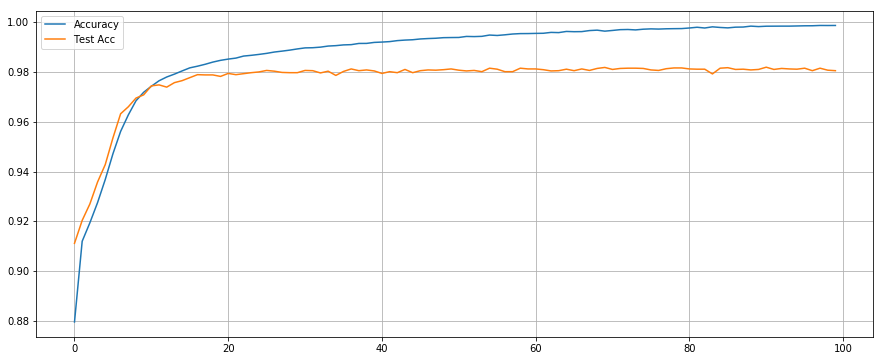

In [20]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(0,epochs), tr.history["acc"])
plt.plot(np.arange(0,epochs), tr.history["val_acc"])
plt.legend(('Accuracy', "Test Acc"))
plt.grid()
plt.show()


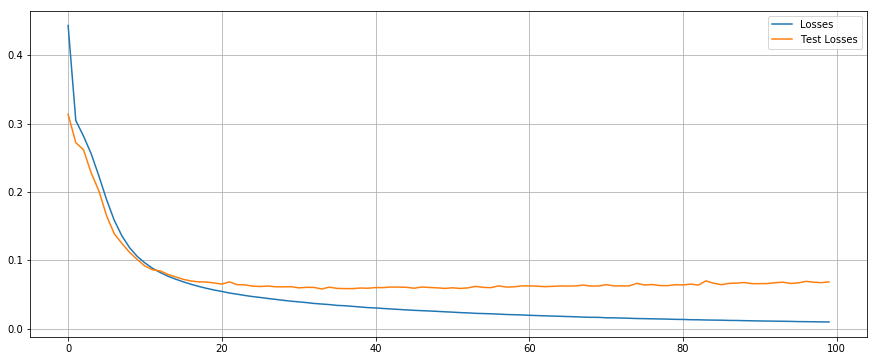

In [19]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(0,epochs), tr.history["loss"])
plt.plot(np.arange(0,epochs), tr.history["val_loss"])
plt.legend(('Losses', "Test Losses"))
plt.grid()
plt.show()

[Loss, Accuracy]

In [13]:
model.evaluate(X_test, y_test, verbose=1)


10000/10000 [==============================] - 0s 31us/step


[0.06856656034073676, 0.9805]

# 2. ShallowNet with CIFAR-10